In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import json

file_path = "/content/drive/My Drive/ML Colab Notebooks/YoutubeKnowsMeInsideOut/YouTube and YouTube Music/history/watch-history.json"
file_data = open(file_path, 'r', encoding="UTF8").read()
history = json.loads(file_data, encoding="UTF8")

print(f'Loaded history data from {file_path}')
print(f'Found a total of {len(history)} videos watched')

Loaded history data from /content/drive/My Drive/ML Colab Notebooks/YoutubeKnowsMeInsideOut/YouTube and YouTube Music/history/watch-history.json
Found a total of 10852 videos watched


In [3]:
import pandas as pd
import numpy as np
import os
from PIL import Image
from os import path

In [7]:
import importlib, importlib.util
def module_from_file(module_name, file_path):
    spec = importlib.util.spec_from_file_location(module_name, file_path)
    module = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(module)
    return module

video_module = module_from_file("Video", "/content/drive/My Drive/ML Colab Notebooks/YoutubeKnowsMeInsideOut/video_class.py")


In [12]:
from tqdm import tqdm

videos_watched = [video_module.Video(video_data) for video_data in tqdm(history)]

print(f'Parsed {len(videos_watched)} videos')



  0%|          | 0/10852 [00:00<?, ?it/s]

 10%|▉         | 1043/10852 [00:00<00:00, 10429.07it/s]

 20%|██        | 2199/10852 [00:00<00:00, 10742.48it/s]

 31%|███       | 3362/10852 [00:00<00:00, 10992.09it/s]

 42%|████▏     | 4527/10852 [00:00<00:00, 11179.93it/s]

 52%|█████▏    | 5671/10852 [00:00<00:00, 11256.66it/s]

 62%|██████▏   | 6753/10852 [00:00<00:00, 11121.44it/s]

 72%|███████▏  | 7843/10852 [00:00<00:00, 11053.95it/s]

 83%|████████▎ | 9018/10852 [00:00<00:00, 11251.81it/s]

100%|██████████| 10852/10852 [00:00<00:00, 11231.90it/s]

Parsed 10852 videos


In [13]:
import math

total_time = videos_watched[0].time - videos_watched[-1].time
print(f'Between the time you first watched a video and your last view, {total_time.days} days have passed')
hours = math.floor(total_time.seconds / 3600)
minutes = math.floor((total_time.seconds % 3600) / 60)
seconds = (total_time.seconds % 60)
print(f'{total_time.days} days, {hours} hours, {minutes:.0f} minutes and {seconds} seconds to be exact.')

Between the time you first watched a video and your last view, 1752 days have passed
1752 days, 20 hours, 26 minutes and 26 seconds to be exact.


In [14]:
print("First video you",videos_watched[-1].title)


First video you Watched Scene: Jo Tumne Kabhi Nahin Kaha | Hum Tum | Saif Ali Khan | Rani Mukerji


In [15]:
print(f'On average you watched {len(videos_watched)/total_time.days:.4f} videos per day')


On average you watched 6.1941 videos per day


In [18]:
from collections import Counter
from matplotlib import pyplot as plt

video_counter = Counter(videos_watched)
print(f'You watched a total of {len(video_counter)} unique videos')
print("Your top 50 most watched videos are:")
for video, amount in video_counter.most_common(50):
    print(f'{amount} views: {video}')

You watched a total of 6484 unique videos
Your top 50 most watched videos are:
282 views: Watched a video that has been removed by @Unknown
64 views: Watched Arnab Goswami Granted Bail By SC | LIVE News | LIVE TV 24x7 | Republic TV LIVE by @Republic World
56 views: Watched KHAAB || AKHIL || PARMISH VERMA || NEW PUNJABI SONG 2018 || CROWN RECORDS || by @Crown Records
55 views: Watched Daru Badnaam | Kamal Kahlon & Param Singh | Official Video | Pratik Studio | Latest Punjabi Songs by @VIP Records
43 views: Watched OSCAR - Video Song | Kaptaan | Gippy Grewal feat. Badshah | Jaani, B Praak by @Tips Official
40 views: Watched Lakk Mera Hit Video Song | Sonu Ke Titu Ki Sweety | Sukriti Kakar, Mannat Noor & Rochak Kohli by @T-Series
36 views: Watched Kala Chashma | Baar Baar Dekho | Sidharth M Katrina K | Prem, Hardeep, Badshah, Kam, Neha, Indeep by @Zee Music Company
35 views: Watched Aaj Se Teri - Lyrical | Padman | Akshay Kumar & Radhika Apte | Arijit Singh | Amit Trivedi by @Zee Music Co

In [19]:
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
tokenizer=RegexpTokenizer("[a-z]+")
title_video = list()
tokens_no = list()

In [20]:
for video in video_counter:
    title_video.append(video.title)

In [21]:
tokens=[tokenizer.tokenize(x.lower()) for  x in title_video]
tokens_no_stopwords=[token for x in tokens for token in x if token not in STOPWORDS]

In [22]:
for tok in tokens_no_stopwords:
    if (not (tok =="video" or tok == "watched" or tok == "youtube" or tok == "https" or tok =="V" or tok =="S" or tok =="t" or tok =="v" or tok =="s")):
        tokens_no.append(tok)

In [23]:
word_count=Counter(tokens_no)


In [35]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


In [36]:
youtube_coloring = np.array(Image.open(path.join(d, "YouTube.jpg")))


In [37]:
df=pd.DataFrame.from_records(word_count.most_common(200))
wc = WordCloud(width=3000, height=1700, background_color="white", mask=youtube_coloring, random_state=42)
wc.generate_from_frequencies(word_count)

In [38]:
image_colors = ImageColorGenerator(youtube_coloring)


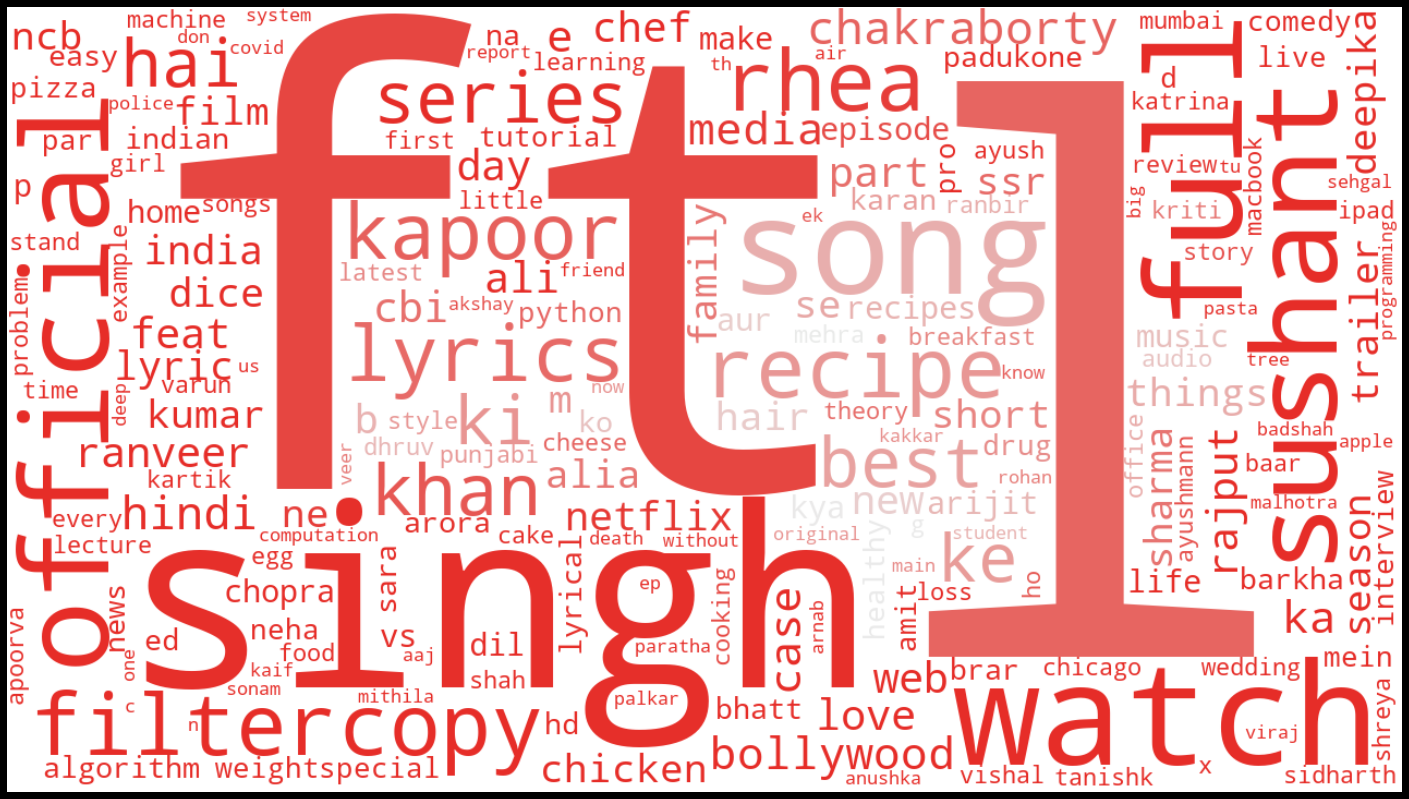

In [39]:
plt.figure(figsize=(25,15), facecolor='k')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('wordcloud.png', facecolor='k', bbox_inches='tight')

You really enjoy a total of 88 videos :


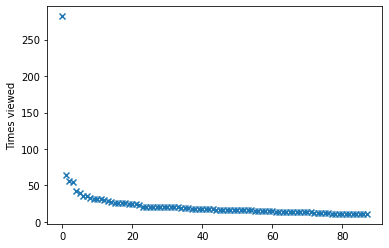

In [40]:
videos_i_enjoy = [
    (video, amount) for video, amount in video_counter.most_common()
    if amount > 10
]

print(f'You really enjoy a total of {len(videos_i_enjoy)} videos :')
plt.scatter(
    range(len(videos_i_enjoy)), 
    [amount for video, amount in videos_i_enjoy],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()

In [41]:

videos_watched_by_channel = [video_module.VideoByChannel(video_data) for video_data in tqdm(history)]
channel_counter = Counter(videos_watched_by_channel)
print(f'You watched a total of {len(channel_counter)} unique channels')
print("Your top 40 most watched channels are:")
for video, amount in channel_counter.most_common(40):
    print(f'{amount} views: {video.channel_name}')



  0%|          | 0/10852 [00:00<?, ?it/s]

 10%|█         | 1098/10852 [00:00<00:00, 10979.33it/s]

 21%|██        | 2232/10852 [00:00<00:00, 11083.13it/s]

 30%|███       | 3302/10852 [00:00<00:00, 10964.47it/s]

 41%|████      | 4447/10852 [00:00<00:00, 11105.11it/s]

 51%|█████▏    | 5571/10852 [00:00<00:00, 11143.06it/s]

 60%|█████▉    | 6502/10852 [00:00<00:00, 10362.66it/s]

 68%|██████▊   | 7421/10852 [00:00<00:00, 9916.10it/s] 

 77%|███████▋  | 8335/10852 [00:00<00:00, 9642.52it/s]

 85%|████████▌ | 9247/10852 [00:00<00:00, 9472.71it/s]

100%|██████████| 10852/10852 [00:01<00:00, 10019.97it/s]

You watched a total of 2267 unique channels
Your top 40 most watched channels are:
1127 views: T-Series
827 views: Ujjawal Trivedi
474 views: FilterCopy
382 views: Zee Music Company
290 views: Dice Media
290 views: SonyMusicIndiaVEVO
282 views: Unknown
175 views: Ali Abdaal
152 views: Sony Music India
136 views: YRF
120 views: Republic World
96 views: Gate Lectures by Ravindrababu Ravula
95 views: Netflix India
89 views: Karan Nawani
79 views: Chef Ranveer
63 views: Tips Official
62 views: KNOWLEDGE GATE
60 views: WaveMusic
56 views: VIP Records
56 views: Crown Records
55 views: Chicago's Best
53 views: RVCJ Media
53 views: The Timeliners
53 views: sentdex
51 views: Strumm Sound
51 views: Sanam
50 views: The Zoom Studios
49 views: Food Insider
44 views: Tushar Roy - Coding Made Simple
44 views: Tutorials Point (India) Ltd.
40 views: Ishkaran Singh Bhandari
40 views: Speed Records
37 views: Republic Bharat
37 views: Sanjeev Kapoor Khazana
33 views: Lyrics Arena
33 views: HidaMari Cookin

You watch 11 channels the most:


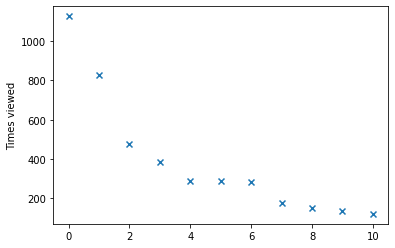

In [42]:
channels_i_enjoy = [
    (video, amount) for video, amount in channel_counter.most_common()
    if amount > 100
]

print(f'You watch {len(channels_i_enjoy)} channels the most:')
plt.scatter(
    range(len(channels_i_enjoy)),
    [amount for video, amount in channels_i_enjoy],
    marker="x"
)
plt.ylabel("Times viewed")
plt.show()

In [44]:
file_path = "/content/drive/My Drive/ML Colab Notebooks/YoutubeKnowsMeInsideOut/YouTube and YouTube Music/history/search-history.json"
file_data = open(file_path, 'r', encoding="UTF8").read()
search_history = json.loads(file_data, encoding="UTF8")

print(f'Loaded search history data from {file_path}')
print(f'Found a total of {len(search_history)} videos searched')

Loaded search history data from /content/drive/My Drive/ML Colab Notebooks/YoutubeKnowsMeInsideOut/YouTube and YouTube Music/history/search-history.json
Found a total of 4833 videos searched


In [50]:
search_title_list = list()

for search_title in search_history:
    search_title_list.append(search_title['title'])

In [51]:
tokens=[tokenizer.tokenize(x.lower()) for  x in search_title_list]
tokens_no_stopwords=[token for x in tokens for token in x if token not in STOPWORDS]

In [52]:
for tok in tokens_no_stopwords:
    if (not (tok =="video" or tok == "watched" or tok == "youtube" or tok == "https" or tok =="V" or tok =="S" or tok =="t" or tok =="v" or tok =="s")):
        tokens_no.append(tok)

In [53]:
word_count=Counter(tokens_no)


In [54]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


In [55]:
youtube_coloring = np.array(Image.open(path.join(d, "YouTube.jpg")))


In [56]:
df=pd.DataFrame.from_records(word_count.most_common(200))
wc = WordCloud(width=3000, height=1700, background_color="white", mask=youtube_coloring, random_state=42)
wc.generate_from_frequencies(word_count)

In [57]:
image_colors = ImageColorGenerator(youtube_coloring)


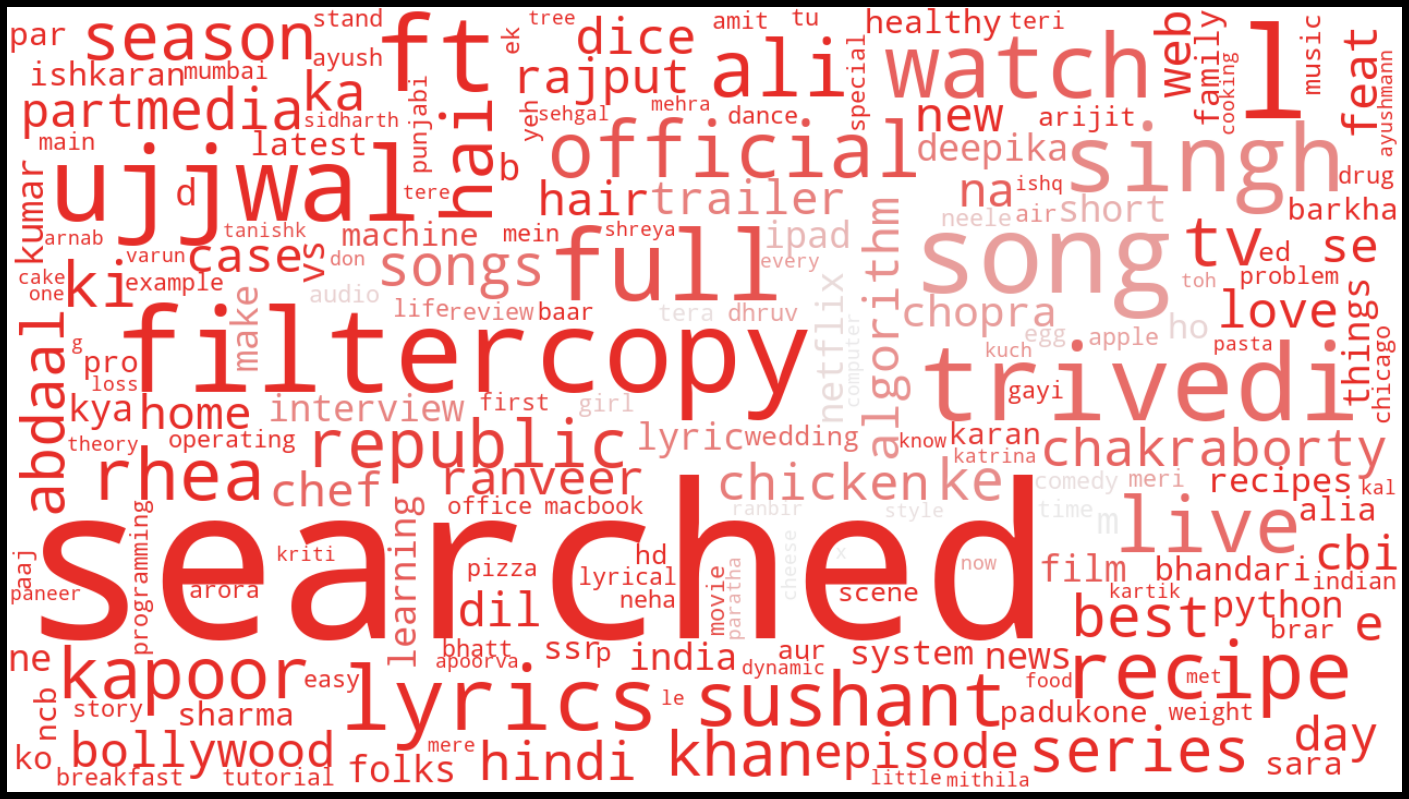

In [58]:
plt.figure(figsize=(25,15), facecolor='k')
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig('search_titles_wordcloud.png', facecolor='k', bbox_inches='tight')

You really searched a total of 1101 videos :


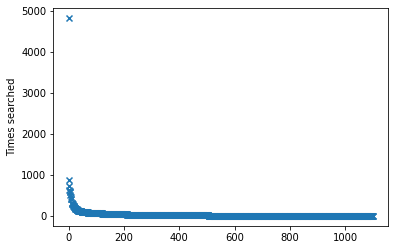

In [61]:
searches_i_enjoy = [
    (video, amount) for title, amount in word_count.most_common()
    if amount > 10
]

print(f'You really searched a total of {len(searches_i_enjoy)} videos :')
plt.scatter(
    range(len(searches_i_enjoy)), 
    [amount for video, amount in searches_i_enjoy],
    marker="x"
)
plt.ylabel("Times searched")
plt.show()